# ELE510 Image Processing and Computer Vision: LAB, Exercise  7, Segmentation.

**Purpose:** *To learn about Segmentation and its applications. Some basic experiments will be implemented using Pyhon, OpenCV and other packages.*

Read the text carefully before starting the work. In many cases it is necessary to do some preparations before you start the work on the computer. Read the necessary theory and answer the theoretical part first. The theoretical and experimental part should be solved individually. The notebook must be approved by the lecturer or the teaching assistants. 

The theory for this exercise can be found in chapter 10 of the text book [1]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)
- [scipy](https://docs.scipy.org/doc/)

<div class="alert alert-block alert-info">
Please, make sure that you have previously installed all the packages contained in the `requirements.txt` file.
</div>

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single PDF file. Read the `ELE510_Getting_started.pdf` file for more information.
</div>

## Note regarding the notebook

- You will find placeholders marked with `...` throughout the code. Your task is to replace each `...` with the appropriate code. Ensure that each placeholder is properly filled in to complete the implementation.

- The theoretical questions have to be answered directly on the notebook using the *Markdown* cells marked as **Answer here**. LaTex commands (if relevant) are available using the command `$...$`. You can also attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`

## Problem 1. Thresholding.

Image segmentation is a crucial technique in image processing and computer vision that involves partitioning an image into multiple segments or regions. In this context, thresholding is a simple yet effective technique. It involves converting a grayscale image $I$ into a binary image $I'$, where pixels are assigned one of two values based on whether they are above or below a specified threshold $\tau$:

\begin{equation}
    I'(x,y) = \left\{
        \begin{array}{cl}
            1 & \text{if } I(x,y) > \tau \\
            0 & \text{otherwise}
        \end{array}
    \right.
\end{equation}

**a)** Implement simple thresholding on the `white_rose.jpg` image provided in order to segment the white rose. Use the `cv2.threshold` with the middle value in the range [0,255] as the threshold. Then, estimate the histogram and look at it, what would you consider to be the optimal threshold?

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

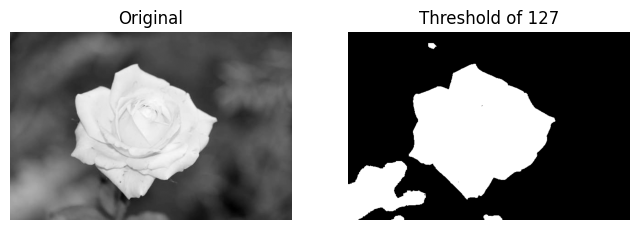

In [2]:
# Read grayscale image
img_path = './images/images/white_rose.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Compute thresholding with the optimal threshold
th, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Display the result
plt.figure(figsize=(8,8))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis('off')
plt.subplot(122), plt.imshow(binary_img, cmap='gray'), plt.title("Threshold of %d" % th), plt.axis('off')
plt.show()

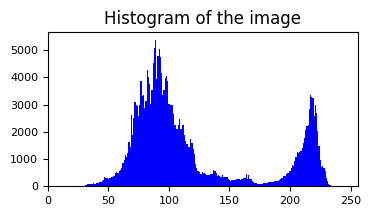

In [3]:
# Estimate histogram
input_hist, input_bin = np.histogram(img.ravel(), bins=256, range=[0,256])

# Show histogram
plt.figure(figsize=(4,2))
plt.bar(input_bin[:-1], input_hist, width=np.diff(input_bin), color = 'b')
plt.title("Histogram of the image")
plt.xlim([0,256])
plt.tick_params(axis='both', labelsize=8)

**Answer here**

the optimal threshhold will be between the peaks. Lets say 120-150 region.

**b)** Explain what the Otsu's method is and how it works.

It splits at every level between 0-255 and picks the best working, low varience split. 

**c)** Find the optimal threshold in the previous image using Otsu's method. Compare the results between previous thresholding and Otsu's method.

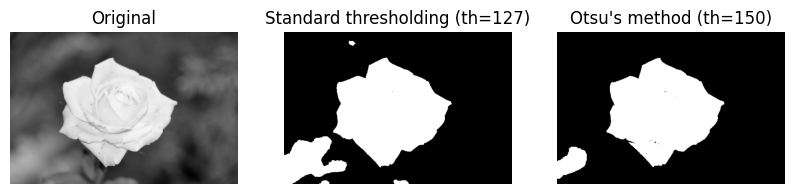

In [4]:
# Without Gaussian noise

# Simple thresholding
th, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Otsus method
o_th, o_binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis('off')
plt.subplot(132), plt.imshow(binary_img, cmap='gray'), plt.title("Standard thresholding (th=127)"), plt.axis('off')
plt.subplot(133), plt.imshow(o_binary_img, cmap='gray'), plt.title("Otsu's method (th=%d)" % o_th), plt.axis('off')
plt.show()

**Answer here**

Instead of picking an exact number in the first question i gave a range of 120-150. Both are falling in that range. But I see the Otsu's method is much more precise and Results show how it managed to pick a better split. It is not 100% perfect, but far better than just picking the threshold randomly between the peaks.

**d)** What is adaptive thresholding and in which situations is particularly useful? 

**Answer here**

when lighting and brightness changes across the image spliting the image in two pices doesnt work anymore. We can se in the results above there is a small portion that is wrong even in the otsu's model. In that case, adaptive gives us more flexibility.

**e)** Implement adaptive filter in both `white_rose.jpg` and `white_rose_shadow.jpg` images using `cv2.adaptiveThreshold`. Compare the results with the Otsu's method.

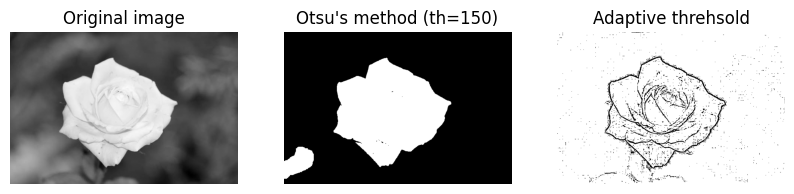

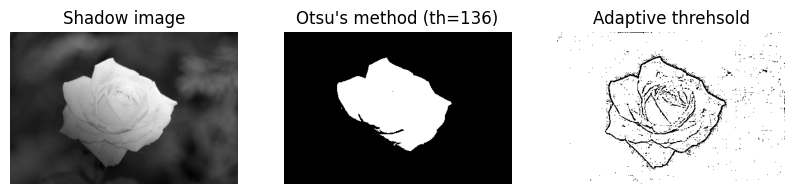

In [5]:
# Adaptive threhsold with original image
adap_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)

# Read grayscale shadow image
sh_img_path = './images/images/white_rose_shadow.jpg'
sh_img = cv2.imread(sh_img_path, cv2.IMREAD_GRAYSCALE)


# Otsu's method
sh_o_th, sh_o_binary_img = cv2.threshold(sh_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Adaptive thresholding
adap_sh_img = cv2.adaptiveThreshold(sh_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)

# Original image
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title("Original image"), plt.axis('off')
plt.subplot(132), plt.imshow(o_binary_img, cmap='gray'), plt.title("Otsu's method (th=%d)" % o_th), plt.axis('off')
plt.subplot(133), plt.imshow(adap_img, cmap='gray'), plt.title("Adaptive threhsold"), plt.axis('off')
plt.show()

# Shadow image
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(sh_img, cmap='gray'), plt.title("Shadow image"), plt.axis('off')
plt.subplot(132), plt.imshow(sh_o_binary_img, cmap='gray'), plt.title("Otsu's method (th=%d)" % sh_o_th), plt.axis('off')
plt.subplot(133), plt.imshow(adap_sh_img, cmap='gray'), plt.title("Adaptive threhsold"), plt.axis('off')
plt.show()


**Answer here**

While otsu picks one threshhold and sticks with it. Adaptive gives so much more detail, textures, outlines. A little more noise could be the drawback.

## Problem 2. Watershed

The watershed algorithm is a popular image segmentation technique used to separate different objects in an image. It treats the image like a topographic surface where the intensity values represent the elevation. This algorithm is particularly effective for separating touching or overlapping objects in an image. However, watershed cannot be applied directly to an image. It is required to find the gradient or the distance transform of the image first.

In this exercise, we will implement the watershed algorithm step by step:
- Smooth the images.
- Thresholding with Otsu's method.
- Distance transform based on the binary mask and find local maxima.
- Find markers and apply Watershed.
- Postprocessing.

In [6]:
# Additional libraries
import imutils

from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

**a)** Load the `coins.jpg` image and perform mean shift filtering to remove details in the image and aid the thresholding step. Use the `cv2.pyrMeanShiftFiltering` function with spatial radius `sp=31` and color radius `sr=61`.

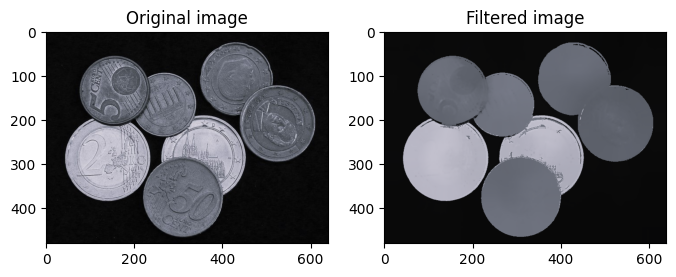

In [7]:
# load the RGB image
img = cv2.cvtColor(cv2.imread('./images/images/coins.jpg'), cv2.COLOR_BGR2RGB)

# Apply filtering
shifted = cv2.pyrMeanShiftFiltering(img, sp=31, sr=61)

# Display results
plt.figure(figsize=(8,8))
plt.subplot(121), plt.imshow(img), plt.title("Original image")
plt.subplot(122), plt.imshow(shifted), plt.title("Filtered image")
plt.show()

**b)** We see that some of the coins are separated but some are not. Therefore, we need to continue with the watershed algorithm. First, apply the Otsu's method.

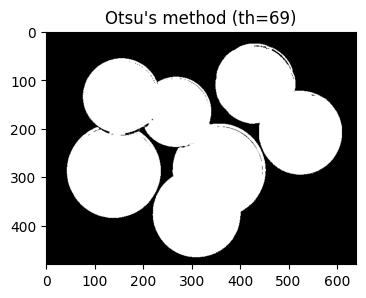

In [8]:
# Otsu's method
_th, img_thresh = cv2.threshold(cv2.cvtColor(shifted, cv2.COLOR_RGB2GRAY), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
plt.figure(figsize=(4,4))
plt.imshow(img_thresh, cmap='gray'), plt.title("Otsu's method (th=%d)" % _th)
plt.show()

**c)** Compute distance transform with `ndimage.distance_transform_edt`. This function computes the Euclidean distance from every binary pixel to the nearest zero pixel Then, find the peaks with `peak_local_max` with a minimum distance between peaks of 30 pixels.

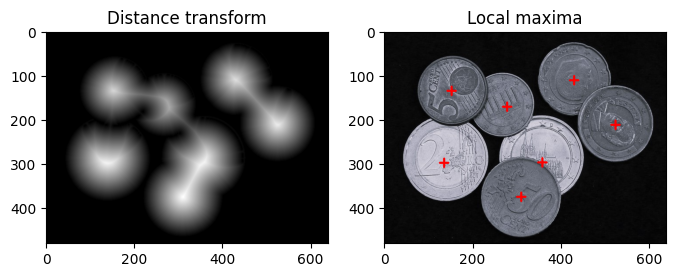

In [9]:
# Distance transform
D = ndimage.distance_transform_edt(img_thresh)

# Find peaks (local maxima). Use the thresholded image as `labels` parameter
max_cords = peak_local_max(D, min_distance=30, labels=img_thresh)

# Create a mask with the local maxima
local_maxima = np.zeros_like(img_thresh, dtype=bool)
local_maxima[tuple(max_cords.T)] = True

# Display results
_img = img.copy() # Auxiliar image for drawing
for a in tuple(max_cords): cv2.drawMarker(_img, a[::-1], color=255, thickness=3)

plt.figure(figsize=(8,8))
plt.subplot(121), plt.imshow(D, cmap='gray'), plt.title("Distance transform")
plt.subplot(122), plt.imshow(_img), plt.title("Local maxima")
plt.show()

**d)** Perform a [connected component analysis](https://en.wikipedia.org/wiki/Connected-component_labeling) on the local peaks, using 8-connectivity, in order to generate unique markers (labels) for the Watershed algorithm. This can be done with `ndimage.label`. Then, apply watershed by using the function `watershed(image=..., markers=..., mask=...)`.

[INFO] Markers used for watershed: [0 1 2 3 4 5 6 7]


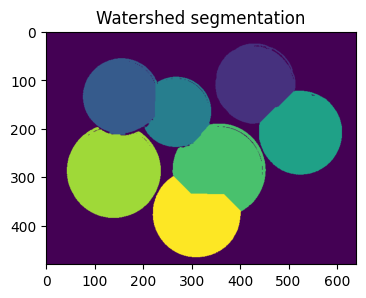

In [10]:
# Find markers (0 is attributed to the background)
markers, _ = ndimage.label(local_maxima)
labels = np.unique(markers)

# Apply Watershed (use -D as iamge)
ws_img = watershed(image=-D, markers=markers, mask=img_thresh)

# Display results
print("[INFO] Markers used for watershed: %s" % labels)
plt.figure(figsize=(4,4))
plt.imshow(ws_img), plt.title("Watershed segmentation")
plt.show()

**e)** Just for fun (**you do not need to code anything here**), you can use this segmented image to extract the coins from the image. To do so, create a mask for each label and find the largest contour. Then, you can draw a circle enclosing the object.

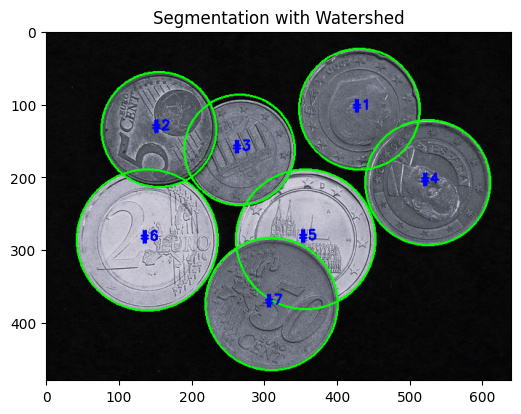

In [11]:
_img = img.copy() # Auxiliar image for drawing

# loop over the unique labels returned by the Watershed algorithm
for label in labels:
    
	# Skip background
	if label == 0: continue
        
	# Create a mask for the label
	mask = np.zeros(ws_img.shape, dtype="uint8")
	mask[ws_img == label] = 255
    
	# Detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
    
	# Draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(_img, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(_img, "#{}".format(label), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Display results
plt.figure(figsize=(6,6))
plt.imshow(_img), plt.title("Segmentation with Watershed")
plt.show()

## Problem 3. Region growing

In this problem, we will implement the Region Growing algorithm, another simple and effective method for image segmentation. It involves starting from a seed point (or a set of seed points) and growing regions by adding neighboring pixels that have similar properties or features (for instance, intensity values). The seed points need to be properly defined according to the task.

Use the following pseudo-code to implement the region-growing function. Then, utilize this function to segment the petals of our white rose image `white_rose.jpg`. Compare the results of using different intensity thresholds.

**REGION GROWING**

```
FUNCTION region_growing(image, seed, thresh)
    INPUT Image to segment, seed point to start at, and threshold for closeness criterion

    height, width <- SHAPE image
    ZERO INITIALIZATION region # As a boolean array with image shape
    EMPTY INITIALIZATION queue # Pixels to check

    queue.append(seed)
    region(seed) <- ON

    WHILE len(queue) > 0
        feat_region <- image(region) # Extract the region features based on the current region

        p = frontier.pop(0) # First pixel in the queue
        p_y, p_x <- p

        CREATE neighbors N around p (8-connectivity grid)

        FOR EACH n in N
            IF n IS WITHIN IMAGE BOUNDS AND n IS NOT IN region THEN
                IF abs(image(n) - MEAN(region)) < thresh THEN
                    region(n) <- ON
                    queue.append(n)
        
    RETURN segmented region and its features
END FUNCTION
```

In [12]:
def region_growing(img, seed, thresh):
    height, width = img.shape
    region = np.zeros((height, width), dtype=bool)
    
    # Queue for pixels to check (list with the seed)
    queue = [seed]

    # Region
    region[seed] = True
        
    while queue:

        mean_val = img[region].mean()
        p_y, p_x = queue.pop(0)
        for dy in (-1, 0, 1):
            for dx in (-1, 0, 1):
                if dy == 0 and dx == 0:
                    continue
                ny, nx = p_y + dy, p_x + dx
                if 0 <= ny < height and 0 <= nx < width and not region[ny, nx]:
                    if abs(float(img[ny, nx]) - float(mean_val)) < thresh:
                        region[ny, nx] = True
                        queue.append((ny, nx))

    feat_region = img[region]
        
    return region, feat_region

In [13]:
# Read image in grayscale
img_path = './images/images/white_rose.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define seed point of interest to start the algorithm (white area)
seed_point = (img.shape[0] // 2, img.shape[1] // 2)

# Thresholds for intensity difference
rg_th1 = 10
rg_th2 = 20 
rg_th3 = 30 

# Apply region growing
segmented_image1, features1 = region_growing(img, seed_point, thresh=rg_th1)
segmented_image2, features2 = region_growing(img, seed_point, thresh=rg_th2)
segmented_image3, features3 = region_growing(img, seed_point, thresh=rg_th3)

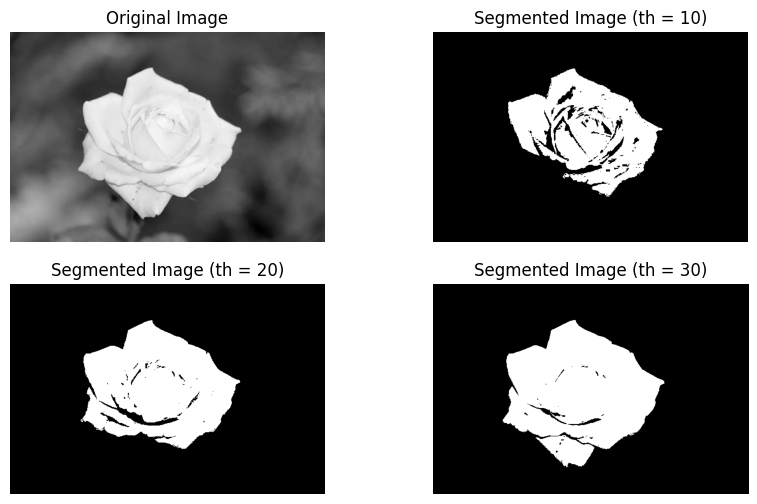

In [14]:
# Plot the original and segmented images
plt.figure(figsize=(10, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(222), plt.imshow(segmented_image1, cmap='gray'), plt.title('Segmented Image (th = %d)' % rg_th1)
plt.axis('off')
plt.subplot(223), plt.imshow(segmented_image2, cmap='gray'), plt.title('Segmented Image (th = %d)' % rg_th2)
plt.axis('off')
plt.subplot(224), plt.imshow(segmented_image3, cmap='gray'), plt.title('Segmented Image (th = %d)' % rg_th3)
plt.axis('off')
plt.show()

## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Md Sazidur Rahman, room E-401
E-mail: md.s.rahman@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.

[3] A. Rosebrock, "Watershed OpenCV", PyImageSearch, 2015.
